### Lecture 5 Demonstration of Transformations

This is a fairly simple demonstration of the effects of transformations on a set of points that form the unit square. It is also a good starting point for seeing how to display point sets.  

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math as m

In [3]:
def apply_and_show(xform):
    '''
        Apply a transformation to the unit square and show the result
    '''
    # Form the unit square.  Setting to float is important here.
    before_points = np.array([(0,0), (1,0), (1,1), (0,1), (0,0)],dtype='float32')
    print(before_points.shape)
    # Apply the transformation.  OpenCV expects the points to be embedded in a 3d array
    after_points = cv2.perspectiveTransform( np.array([before_points]), xform)

    print("after_points shape", after_points.shape)
    print("after points", after_points )
    after_points = after_points[0]
    
    # Extract the x and y lists
    before_x = before_points[:,0]
    before_y = before_points[:,1]
    after_x = after_points[:,0]
    after_y = after_points[:,1]

    # Find the bounds on the display
    x0 = min(np.min(before_x), np.min(after_x)) - 1
    x1 = max(np.max(before_x), np.max(after_x)) + 1
    y0 = min(np.min(before_y), np.min(after_y)) - 1
    y1 = max(np.max(before_y), np.max(after_y)) + 1
    
    # Plot as two separate figures
    plt.plot(before_x, before_y)
    plt.plot(after_x, after_y)
    plt.axis('equal')
    plt.axis([x0,x1,y0,y1])
    plt.show()

(5, 2)
after_points shape (1, 5, 2)
after points [[[ 4.         -1.        ]
  [ 4.7071066  -0.29289323]
  [ 4.          0.41421354]
  [ 3.2928932  -0.29289323]
  [ 4.         -1.        ]]]


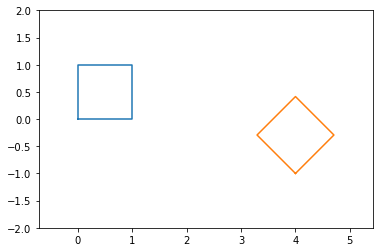

In [4]:
# Rigid transformation
theta = 45 * m.pi / 180
cos_theta = m.cos(theta)
sin_theta = m.sin(theta)
tx, ty = 4, -1
xform = np.array([[cos_theta,-sin_theta,tx],[sin_theta,cos_theta,ty], [0,0,1]], dtype='float32')
apply_and_show(xform)

(5, 2)
after_points shape (1, 5, 2)
after points [[[3.        3.       ]
  [5.04788   4.433941 ]
  [3.613939  6.481821 ]
  [1.5660589 5.04788  ]
  [3.        3.       ]]]


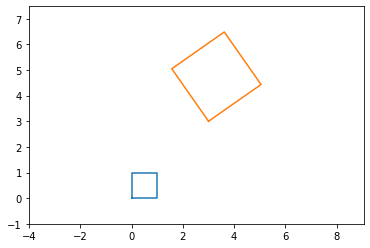

In [5]:
# Similarity transformation
theta = 35 * m.pi / 180
scale = 2.5
a = scale * m.cos(theta)
b = scale * m.sin(theta)
tx, ty = 3, 3
xform = np.array([[a,-b,tx],[b,a,ty], [0,0,1]], dtype='float32')
apply_and_show(xform)

(5, 2)
after_points shape (1, 5, 2)
after points [[[2.  2. ]
  [4.  1.3]
  [3.5 2.3]
  [1.5 3. ]
  [2.  2. ]]]


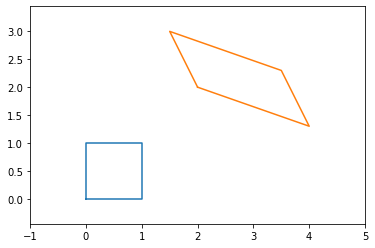

In [6]:
a11 = 2; a12 = -.5
a21 = -0.7; a22 = 1
tx = 2; ty = 2
xform = np.array([[a11,a12, tx],[a21,a22,ty], [0,0,1]], dtype='float32')
apply_and_show(xform)

(5, 2)
after_points shape (1, 5, 2)
after points [[[ 1.5       -1.5      ]
  [ 2.173913  -1.1304348]
  [ 1.4375    -0.1875   ]
  [ 0.8965517 -0.3448276]
  [ 1.5       -1.5      ]]]


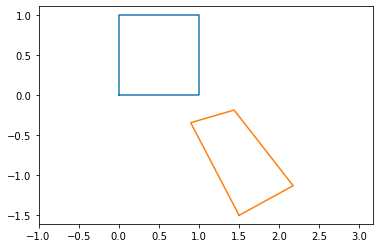

In [7]:
h11 = 1; h12 = -0.2; h13 = 1.5
h21 = 0.2; h22 = 1; h23 = -1.5
h31 = 0.15; h32 = 0.45; h33 = 1
xform = np.array([[h11,h12,h13],[h21,h22,h23], [h31,h32,h33]], dtype='float32')
apply_and_show(xform)